# UNHCR Resettlement Data Finder (Test)

 Source: https://rsq.unhcr.org/en/#AsD1

 Resettlement Data Finder (UNHCR 2015-2023)
 
 Testing of different plotting libs (bar, line, sankey, choropleth Diagrams and more...)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
## Csv query from website
df = pd.read_csv('RSQDepartures-big.csv', skiprows=11) # skip all the nonsense
#Error ParserError: Error tokenizing data. C error: Expected 2 fields in line 12, saw 8

In [3]:
df.dtypes

Year                              object
Country of Origin (ISO)           object
Country of Origin                 object
Country of Asylum                 object
Country of Asylum (ISO)           object
Country of Resettlement (ISO)     object
Country of Resettlement           object
Total departures (persons)       float64
dtype: object

In [4]:
df.tail()

,Year,Country of Origin (ISO),Country of Origin,Country of Asylum,Country of Asylum (ISO),Country of Resettlement (ISO),Country of Resettlement,Total departures (persons)
317,2023,AFG,Afghanistan,TUR,Turkiye,USA,United States of America,28.0
318,2023,SYR,Syrian Arab Rep.,TUR,Turkiye,CAN,Canada,231.0
319,2023,AFG,Afghanistan,TUR,Turkiye,SWE,Sweden,1.0
320,2023,IRQ,Iraq,TUR,Turkiye,AUS,Australia,8.0
321,Some data presented may differ from statistics...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.drop(321)

In [6]:
df.tail()

,Year,Country of Origin (ISO),Country of Origin,Country of Asylum,Country of Asylum (ISO),Country of Resettlement (ISO),Country of Resettlement,Total departures (persons)
316,2023,AFG,Afghanistan,TUR,Turkiye,AUS,Australia,30.0
317,2023,AFG,Afghanistan,TUR,Turkiye,USA,United States of America,28.0
318,2023,SYR,Syrian Arab Rep.,TUR,Turkiye,CAN,Canada,231.0
319,2023,AFG,Afghanistan,TUR,Turkiye,SWE,Sweden,1.0
320,2023,IRQ,Iraq,TUR,Turkiye,AUS,Australia,8.0


In [7]:
# Group Data by Year
summedyear_df = df.groupby(['Year', 'Country of Origin (ISO)'])['Total departures (persons)'].sum().reset_index()


In [8]:
summedyear_df.head()

,Year,Country of Origin (ISO),Total departures (persons)
0,2015,AFG,3412.0
1,2015,IRQ,7588.0
2,2015,SYR,13816.0
3,2016,AFG,559.0
4,2016,IRQ,4435.0


In [9]:
summedyear_df.tail()

,Year,Country of Origin (ISO),Total departures (persons)
22,2022,IRQ,511.0
23,2022,SYR,7166.0
24,2023,AFG,198.0
25,2023,IRQ,30.0
26,2023,SYR,275.0


In [10]:
# Pivot dataframe (rows into columns)
pivot_df = summedyear_df.pivot(index='Year', columns='Country of Origin (ISO)', values='Total departures (persons)')
pivot_df.head(9)

Country of Origin (ISO),AFG,IRQ,SYR
Year,,,
2015,3412.0,7588.0,13816.0
2016,559.0,4435.0,8454.0
2017,269.0,2086.0,11706.0
2018,207.0,300.0,8108.0
2019,1220.0,732.0,8278.0
2020,222.0,601.0,3126.0
2021,912.0,521.0,5614.0
2022,1991.0,511.0,7166.0
2023,198.0,30.0,275.0


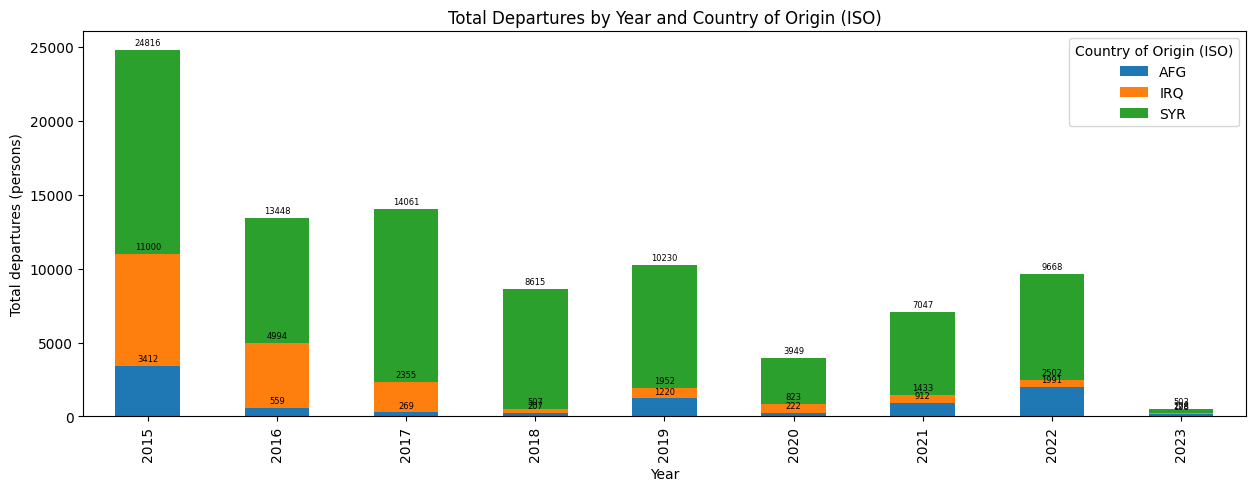

In [11]:
# Bar plot 'fail'
ax = pivot_df.plot(kind='bar', stacked=True, \
                    title='Total Departures by Year and Country of Origin (ISO)',\
                    xlabel='Year', \
                    ylabel='Total departures (persons)', \
                    figsize=(15,5)
                                    )
# Add numbers to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=6, color='black', padding=2)
plt.legend(title='Country of Origin (ISO)')
plt.show()


<Axes: xlabel='Year'>

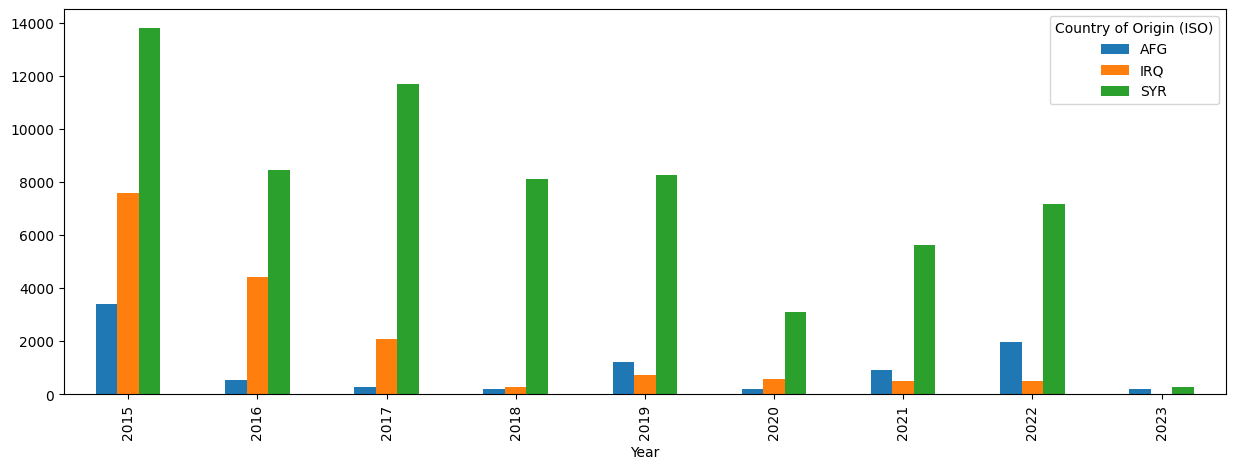

In [12]:
#Basic bar chart 
pivot_df.plot(kind='bar', figsize=(15,5))

<Axes: title={'center': 'Total Departures by Year and Country of Origin (SYR)'}, xlabel='Year', ylabel='Departures'>

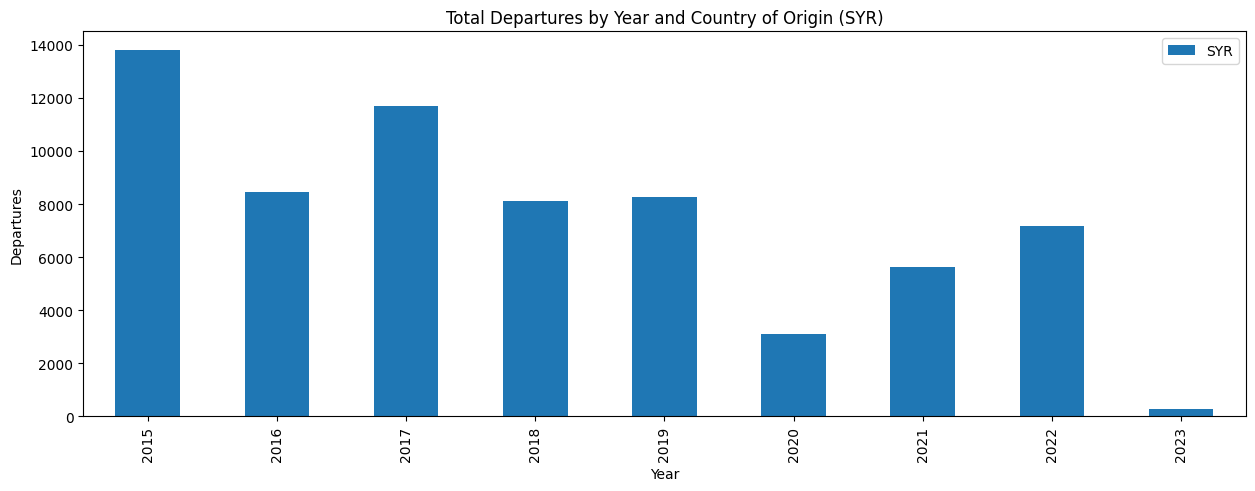

In [13]:
#Random bar chart for SYR
pivot_df['SYR'].plot(kind='bar', \
                     title='Total Departures by Year and Country of Origin (SYR)',\
                     xlabel='Year', \
                     ylabel='Departures', \
                     legend='SYR',\
                     figsize=(15,5))

<Axes: title={'center': 'Total Departures by Year and Country of Origin (ISO)'}, xlabel='Year', ylabel='Departures'>

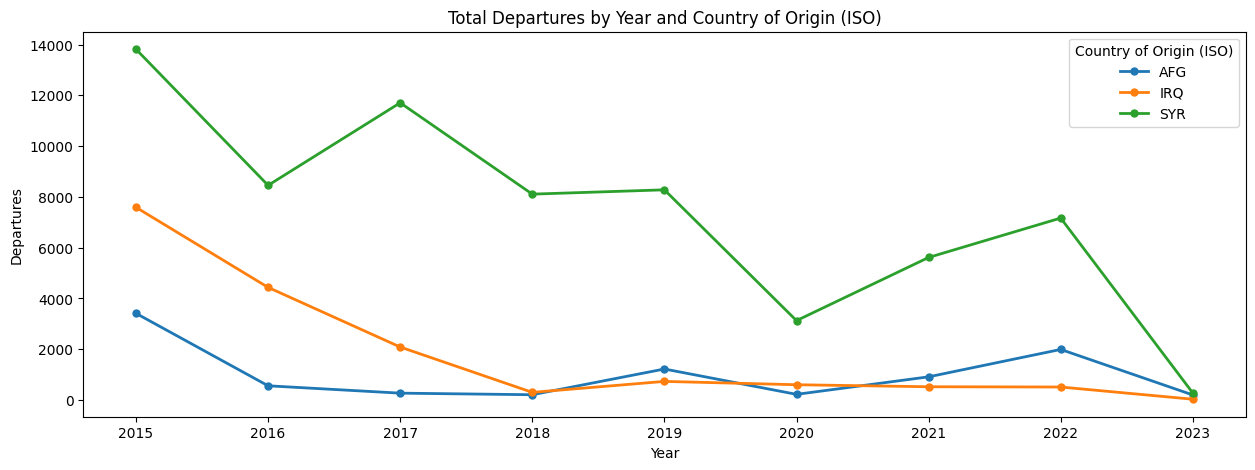

In [14]:
# A better line plot
pivot_df.plot(kind='line', \
                     title='Total Departures by Year and Country of Origin (ISO)',\
                     xlabel='Year', \
                     style='.-', lw='2', ms='10',\
                     ylabel='Departures', \
                     legend='SYR',\
                     figsize=(15,5))

In [15]:
## Group Data by Country
# grouping and sum all observations
summed_df = df.groupby(['Country of Origin (ISO)', 'Country of Resettlement (ISO)'])['Total departures (persons)'].sum().reset_index()
summed_df.head()

,Country of Origin (ISO),Country of Resettlement (ISO),Total departures (persons)
0,AFG,AUS,1653.0
1,AFG,CAN,1540.0
2,AFG,CHE,196.0
3,AFG,DEU,5.0
4,AFG,DNK,14.0


In [16]:
summed_df.shape

(65, 3)

In [17]:
# Basic statistics for Total departures (persons)
summed_df.describe()

,Total departures (persons)
count,65.000000
mean,1420.569231
std,3014.314365
min,1.000000
25%,17.000000
50%,150.000000
75%,1007.000000
max,16836.000000


In [18]:
# Show departures over 500 
filtered_df = summed_df.loc[summed_df['Total departures (persons)'] >= 500] #subset >= 500 persons/ departures
filtered_df.tail()

,Country of Origin (ISO),Country of Resettlement (ISO),Total departures (persons)
46,SYR,GBR,3350.0
57,SYR,NLD,5855.0
58,SYR,NOR,2921.0
63,SYR,SWE,3886.0
64,SYR,USA,6111.0


In [19]:
filtered_df.dtypes

Country of Origin (ISO)           object
Country of Resettlement (ISO)     object
Total departures (persons)       float64
dtype: object

In [20]:
# dtypes persons into int
filtered_df['Total departures (persons)'] = filtered_df['Total departures (persons)'].astype(int)
filtered_df.dtypes


C:\Users\v4sc0\AppData\Local\Temp\ipykernel_9712\1750802994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Total departures (persons)'] = filtered_df['Total departures (persons)'].astype(int)


Country of Origin (ISO)          object
Country of Resettlement (ISO)    object
Total departures (persons)        int32
dtype: object

In [21]:
import plotly.express as px

# Group the data by 'Country of Origin (ISO)' and sum the 'Total departures (persons)'
grouped_df = filtered_df.groupby('Country of Origin (ISO)')['Total departures (persons)'].sum().reset_index()

# Create a choropleth map using Plotly Express
fig = px.choropleth(
    grouped_df,
    locations='Country of Origin (ISO)',
    color='Total departures (persons)',
    hover_name='Country of Origin (ISO)',
    color_continuous_scale=px.colors.sequential.Plasma,  # You can choose other color scales
    title='Choropleth Map: Total Departures by Country of Origin'
)

# Show the map
fig.show()

In [22]:
# Group the data by 'Country of Resettlement (ISO)' and sum the 'Total departures (persons)'
grouped2_df = summed_df.groupby('Country of Resettlement (ISO)')['Total departures (persons)'].sum().reset_index()

# Create a choropleth map using Plotly Express
fig = px.choropleth(
    grouped2_df,
    locations='Country of Resettlement (ISO)',
    color='Total departures (persons)',
    hover_name='Country of Resettlement (ISO)',
    color_continuous_scale=px.colors.sequential.Plasma,  # You can choose other color scales
    title='Choropleth Map: Total Departures byCountry of Resettlement'
)

# Show the map
fig.show()

In [23]:
## Sankey Chart with Plotly 

# Create a list of unique country codes
unique_countries = pd.concat([filtered_df['Country of Origin (ISO)'], filtered_df['Country of Resettlement (ISO)']]).unique()

# Create a mapping from country code to index
country_to_index = {country: index for index, country in enumerate(unique_countries)}

# Create source and target indices for the Sankey links
source_indices = filtered_df['Country of Origin (ISO)'].apply(lambda x: country_to_index[x])
target_indices = filtered_df['Country of Resettlement (ISO)'].apply(lambda x: country_to_index[x])

# Create a Plotly Sankey chart
fig = go.Figure(go.Sankey(
    node=dict(
        pad=1.5,
        thickness=50,
        line=dict(color="black", width=0.5),
        label=unique_countries
    ),
    link=dict(
        arrowlen=15,
        source=source_indices,
        target=target_indices,
        value=filtered_df['Total departures (persons)']
    )
))

# Update layout settings
fig.update_layout(title_text="Sankey Chart: Departures by Origin and Resettlement",
                  font=dict(size=15))

# Show the chart
fig.show()

In [24]:
# Testing string counts
summedyear_df['Year'].str.count("2015")

0     1
1     1
2     1
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
Name: Year, dtype: int64